<a href="https://colab.research.google.com/github/SaurabhAradwad/EDA-Capstone/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Airbnb Booking Analysis**

**Capstone Project EDA**

**Team - pro-infinity**

**Team Members - Ayush Sharma, Saurabh Aradwad, Rishika Rai, Aman Guleria**

**Problem statement**

###Airbnb is a privately held website that connects homeowners with travelers looking for accommodations. With the help of few guidelines that allow hosts to compare their listings to others in the area to determine a fair price, Airbnb gives its hosts unlimited freedom to set the price for their units. On the other hand, guests who use Airbnb frequently experience lodging issues for a variety of reasons. Seasonal rushes, unforeseen cancellations of reservations, host preferences, etc. may all fall under this category.

### As airbnb seeks to learn more about its services and service providers, data will be analysed in accordance with the following questions.

### Q.1 Which are the busiest or least busy areas according to customers and why?
###Q.2 Which hosts are the busiest and why?
### Q.3 Is there any noticeable difference of traffic among different areas and what could be the reason for it? 
###Q4. What can we learn from prices, area & reviews from given dataset? 

### Basic imports and csv mounting 

In [55]:
# Importing all the required libraries for the analysis of given dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
import seaborn as sns

In [56]:
# Connecting to GitHub repository 

!git clone https://github.com/SaurabhAradwad/EDA-Capstone.git

fatal: destination path 'EDA-Capstone' already exists and is not an empty directory.


In [57]:
# importing csv file

airbnb = pd.read_csv("/content/EDA-Capstone/Airbnb NYC 2019.csv")
 

In [58]:
# Checking csv mounting

airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Basic DataFrame Inspection using methods and functions

In [59]:
# Computing Dataset length using length function 

len(airbnb)

48895

In [60]:
# Checking All 16 columns

airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [61]:
# Analysing Columns Data with the help of transpose

airbnb.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [62]:
# Checking last rows with the help of tail method

airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [63]:
# Checking the number of rows and columns of the DataFrame

airbnb.shape

(48895, 16)

In [64]:
# Getting summry statistics of DataFrame
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Looking and handling NaN, Null & Missing Values


In [65]:
# Detailed review of entire data including all entries, null info and data type

airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [66]:
#We are checking here that how many null values are there in dataset.

airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

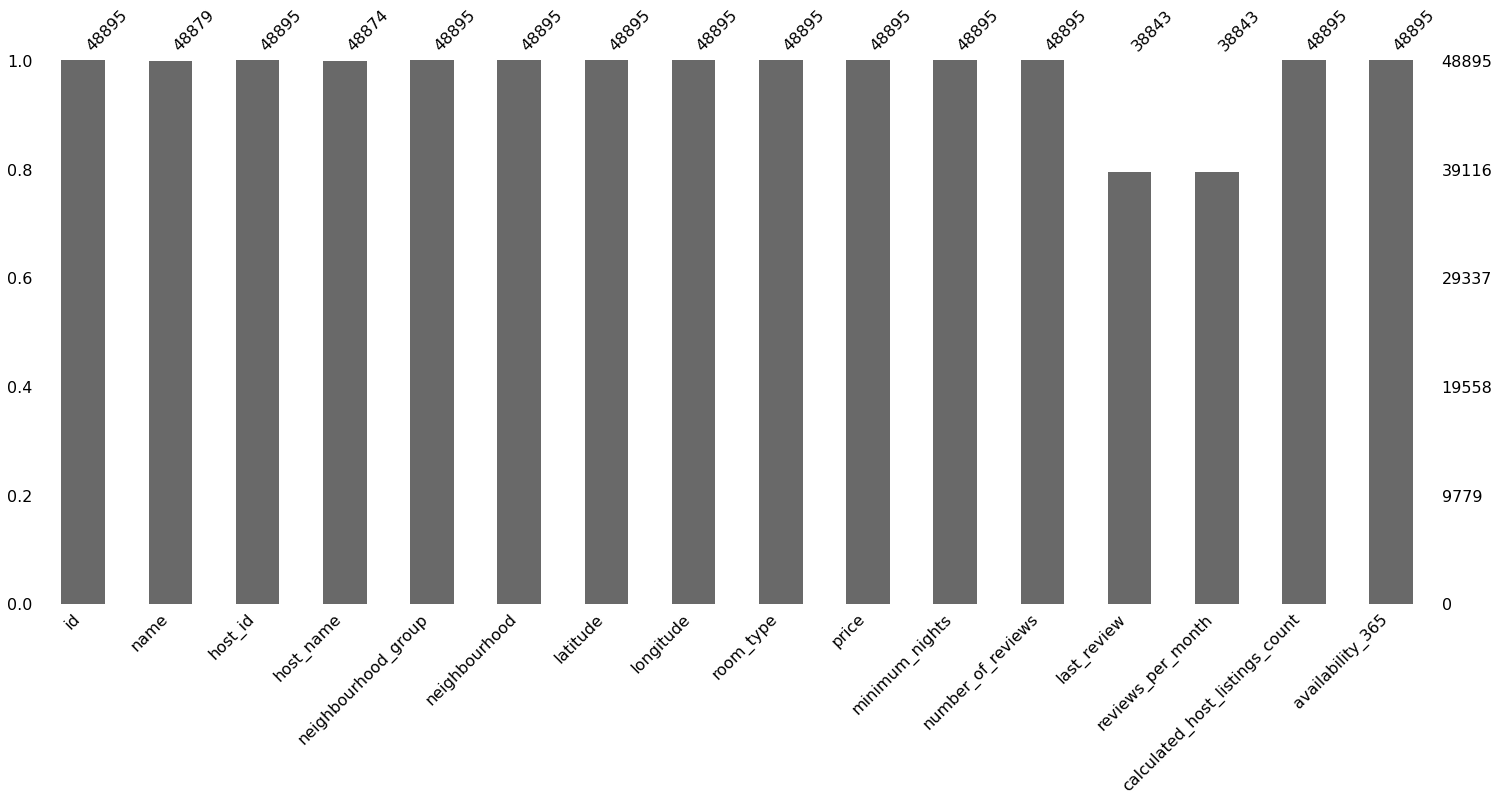

In [67]:
# Countplot for null values(before)
# Visualize the number of missing
# values as a bar chart
msno.bar(airbnb)

In [68]:
# We are treating null values as per required.

airbnb.fillna({'reviews_per_month':0 , 'last_review':0, 'name': 'NO_NAME', 'host_name':'NO_NAME' },inplace=True)

In [69]:
# We are rechecking null values.

airbnb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

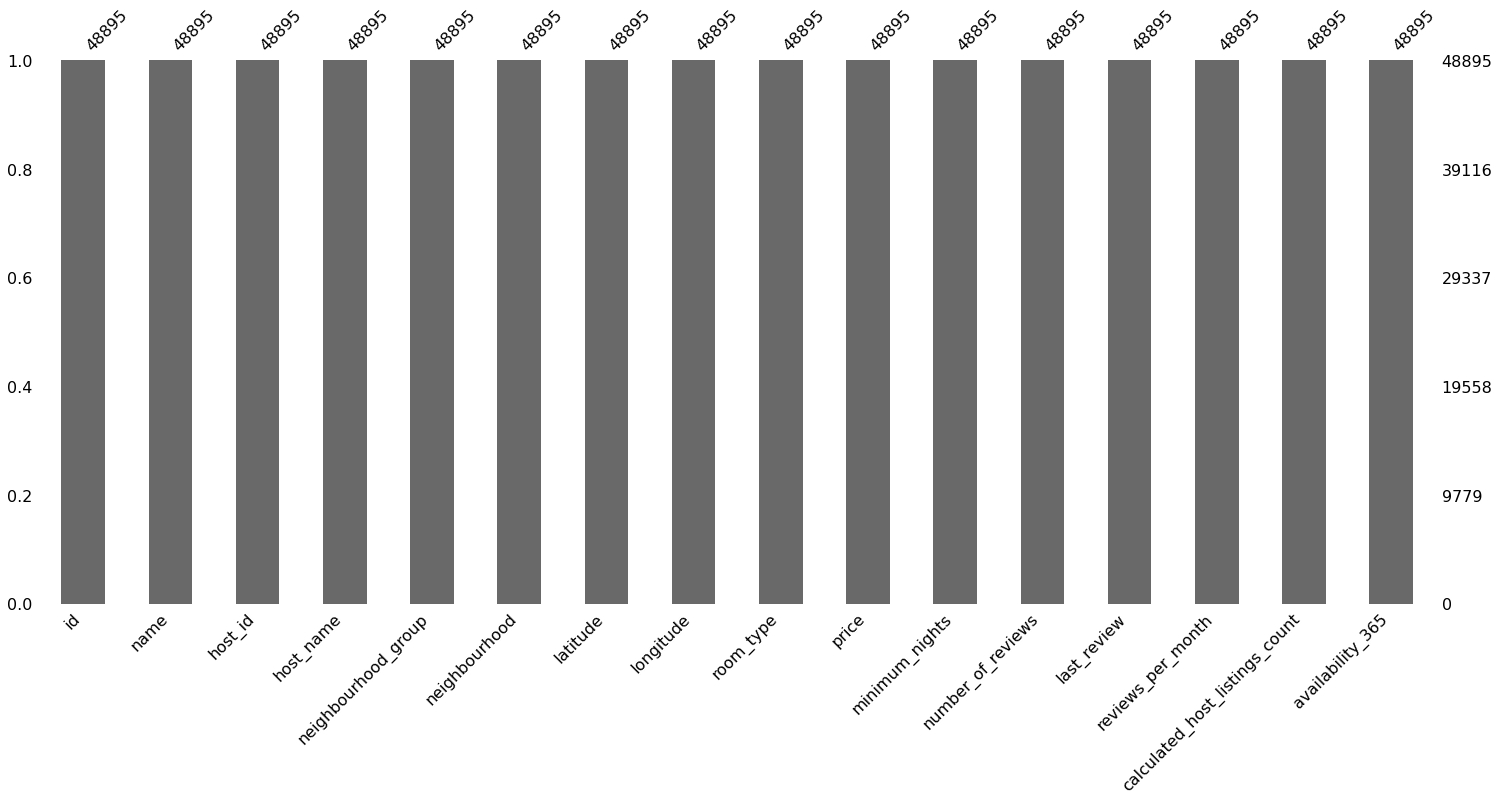

In [70]:
# Countplot for null values(after)
# Countplot for null values(before)
# Visualize the number of missing
# values as a bar chart
msno.bar(airbnb);

## Comment Regarding Null values 

### In 'name' and 'host_name' consist some null strings treating them with string 'NO_NAME', This treatment does not going to affect this dataset anyway.

### In 'last_review' or 'reviews_per_month' consist some null values treating these values with mean or median values may affect statistical summary henced treated as integer '0'


### Q1 Which are the busiest or least busy areas according to customers and why?

In [71]:
# Examining the unique values of n_group as this column will appear very handy for later analysis

u_neighbourhood_group = airbnb.neighbourhood_group.unique()

print(u_neighbourhood_group)

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [72]:
# Examining the unique values of neighbourhood as this column will appear very handy for later analysis

U_ne = airbnb.neighbourhood.unique()


In [73]:
len(U_ne)

221

In [74]:
airbnb.neighbourhood_group.value_counts().head()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


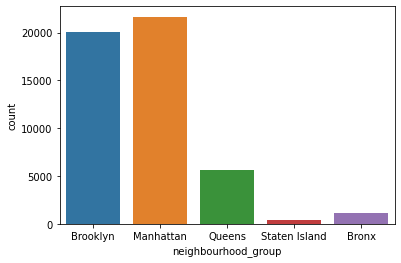

In [75]:
# Countplot for neighbourhood_group using sns. It will give us histogram of count for areas.

sns.countplot(airbnb.neighbourhood_group);
plt.show();

### From plot we get Manhattan, Brooklyn, Queens on higher level with respect to Staten Island & Bronx. 

### In order to determine why some regions are busier than others, we will do further analysis that takes into account the neighbourhood and the kind of lodging (room type).


In [76]:
# examining the unique values of room_type as this column will appear very handy for later analysis

airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
# Countplot for room_type: gives us idea about availabilty of types 

sns.countplot(airbnb.room_type);

In [ ]:
# Finding out top 5 neighbourhoods
airbnb.neighbourhood.value_counts().head()

In [ ]:
# Let's now combine this with our boroughs and room type for a rich visualization we can make

# Grabbing top 5 neighbourhoods for sub-dataframe
top5_ne_areas =airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side'])]

# Using catplot to represent multiple interesting attributes together and a count
sns.catplot(x='neighbourhood_group', hue='neighbourhood', col='room_type', data= top5_ne_areas, kind='count');
plt.plot()

### From this we can conclude that most preffered neighborhood is listed mostly with either "Privet Room" or "Entire home/Apt". 

### "Shared Rooms" are least preffered in most busiest areas.

### The neighbourhood group with the most activity, Manhattan, has the fewest rooms labelled as "Shared Rooms."

### Only Manhattan and Brooklyn are featured among the top 5 neighbourhood groupings, thus we may assume that these are the most well-liked travel destinations.

In [93]:
# Creating a geospectial plot for all the locations in NYC

top20_hosts_aibnb = airbnb.sort_values(by='number_of_reviews', ascending=False).head(20)

import folium

In [94]:
map1 = folium.Map(location = [40.67853,	-73.94995], zoom_start = 11)

#create a marker for each school
for row in top20_hosts_aibnb.iterrows():
  row_values = row[1]

  location = [row_values['latitude'], row_values['longitude']]

  popup = popup = '<strong>' + row_values['name'] + '</strong>'

  marker = folium.Marker(location = location , popup = popup)
  
  marker.add_to(map1)

  display(map1)

### Most busiest area : Manhattan

### Most preferred room type : Entire home or apartment

###Least preferred room type : Shared room

### The top 20 hosts with maximum number of reviews we have considered to shocase their location with marker and this is also showing the maximum markers are situated inside Manhattan. Followed by Queens and Brooklyn.

### Most people have chosen Manhattan and Brooklyn as their area preference and we have found that most of the rooms in these areas are listed as ‘entire home/apt’ or ‘private room’.


### Q.2 Which hosts are the busiest and why?


In [87]:
# Grouping required columns and sorting them to get busiest host

busiest_hosts = airbnb.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()

busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)

busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37766,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


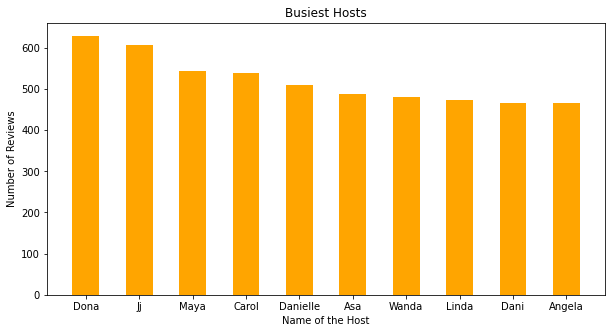

In [44]:
# Graph plotting between number of host and number of review to get Busiest Hosts

name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, reviews, color ='orange', width = 0.5)
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

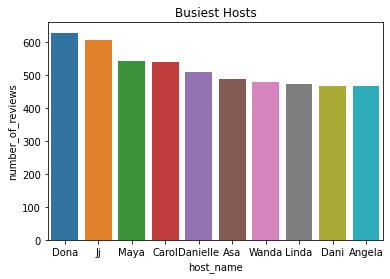

In [45]:
# Graph plotting between number of host and number of review to get Busiest Hosts using SNS.

sns.barplot(x=name, y= reviews, data= busiest_hosts);
plt.title("Busiest Hosts")
plt.show()

### Busiest hosts are:
#### 1.  Dona
#### 2.   Ji
#### 3.   Maya
#### 4.   Carol
#### 5.   Danielle

### As per the above analysis, most of these hosts have listed room types as "entire home" and "private room," which is preferred by most people.

### Q.3 Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [46]:
# Grouping neighbourhood_group & room_type with respect to min nights

traffic_areas = airbnb.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


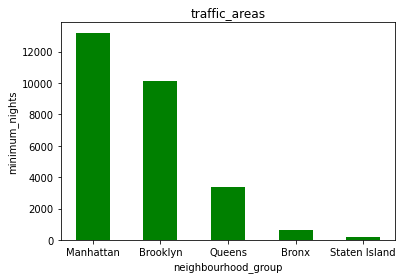

In [47]:
# Graph plotting bewteen neighbourhood_group & min nights to show traffic areas

name = traffic_areas['neighbourhood_group']
nights = traffic_areas['minimum_nights']


# creating the bar plot
plt.bar(name, nights, color = 'green', width = 0.5)
plt.xlabel("neighbourhood_group")
plt.ylabel("minimum_nights")
plt.title("traffic_areas")
plt.show()

###From the above analysis, we can see that people are preferring entire homes/apts or private rooms, which are present in Manhattan, Brooklyn, and Queens, and people are preferring listings which are lower in price.

### Q4. What can we learn from prices, area & reviews from given dataset? 

In [48]:
# Grouping and taking maximum reviews using max function form given dataset

areas_reviews = airbnb.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  if __name__ == '__main__':


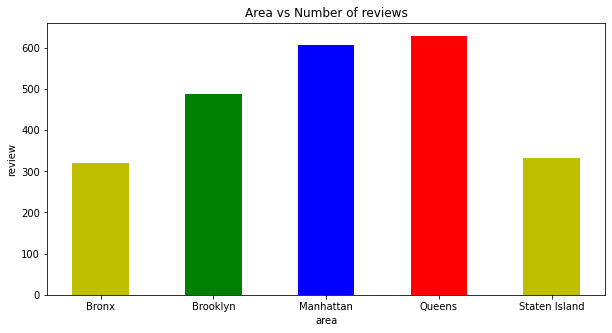

In [49]:
# Creating plot between area and number of reviews 

area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(area, review, color ='YGBR', width = 0.50)
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show();

In [50]:
# Grouping and taking maximum price using number of reviews through max function form given dataset

price_area = airbnb.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


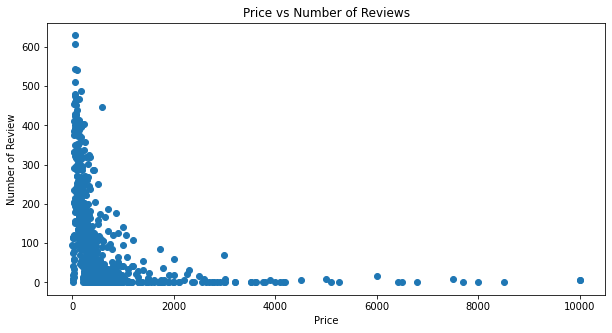

In [51]:
# Plotting garph between price and number of reviews 

area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

In [52]:
# last column we need to look at is 'number_of_reviews'

# let's grab 10 most reviewed listings in NYC
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0


In [53]:
# Taking Average price according to per night stay from top_reviewed_listings
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4


###From this table output, we can observe that top 10 most reviewed listings on Airbnb for NYC has price average of \$65 with most of the listings under \$50, and 9 out of 10 of them are "Private room" type, top reviewed listing has 629 reviews.

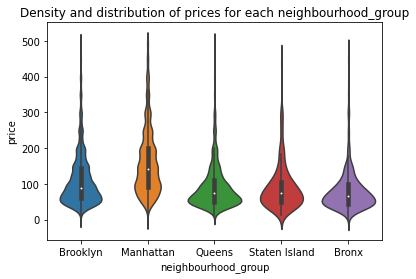

In [54]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500

var_1 = airbnb[airbnb.price < 500]

#using violinplot to showcase density and distribution of prices 

viz = sns.violinplot(x='neighbourhood_group', y='price',data = var_1)
viz.set_title('Density and distribution of prices for each neighbourhood_group');
plt.show()

### From the above Analysis we can say that most people prefer to stay in place where price is less.

### First, we can state that Manhattan has the highest range of prices for the listings with \$150 price as average observation, followed by Brooklyn with \$90 per night. 
### Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. 

### This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living hence prices are lower.

##Conclusion:
###1. People who want to reside in a full house or apartment will only stay a little bit longer in that neighbourhood.
###2. People who choose to remain in a private room won't stay as long as they would in a home or an apartment.
###3. Most people choose making smaller payments.
###4. If there are more reviews for a specific neighbourhood group, it is likely that the location is popular with tourists.
###5. People are considered travellers if they don't stay for more than one night.
